In [1]:
using Distributions
using Random

"""
check_unbiasedness(dist, n; niters=10^6)

確率分布 `dist` のサイズ `n` の標本の不偏分散を `niters` 回計算し, 
それらの平均値と `dist` の分散の比を返す.
"""
function check_unbiasedness(dist, n; niters=10^6)
    S² = zeros(niters)
    Xtmp = zeros(eltype(dist), n)
    for i in 1:niters
        X = rand!(dist, Xtmp) # size-n sample of dist
        S²[i] = var(X) # unbiased sample variance
    end
    mean(S²) / var(dist)
end

@doc check_unbiasedness

check_unbiasedness(dist, n; niters=10^6)

確率分布 `dist` のサイズ `n` の標本の不偏分散を `niters` 回計算し,  それらの平均値と `dist` の分散の比を返す.


In [2]:
check_unbiasedness(Gamma(1/2, 2), 5)

0.9978928839376942

In [3]:
check_unbiasedness(InverseGamma(4, 4), 5)

1.0079152427973292

In [4]:
function check_unbiasedness_multithread(dist, n; niters=10^7)
    S² = zeros(niters)
    Xtmp = [zeros(eltype(dist), n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:niters
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid]) # size-n sample of dist
        S²[i] = var(X) # unbiased sample variance
    end
    mean(S²) / var(dist)
end

check_unbiasedness_multithread(Gamma(1/2, 2), 5; niters=10^7)

0.9997016618204474

In [5]:
using Distributions

bin = Binomial(100, 1/5)
k = 30

@show sum(pdf(bin, j) for j in k:maximum(bin))
@show ccdf(bin, k - 1)
@show ccdf(bin, k - 0.5)
@show ccdf(bin, k)
;

sum((pdf(bin, j) for j = k:maximum(bin))) = 0.01124897872099173
ccdf(bin, k - 1) = 0.011248978720991667
ccdf(bin, k - 0.5) = 0.011248978720991667
ccdf(bin, k) = 0.006059335481042999


In [6]:
using QuadGK
using SpecialFunctions
using Distributions
using StatsPlots
default(fmt=:png)

function beta_inc_quadgk(a, b, x)
    P = quadgk(t -> t^(a-1)*(1-t)^(b-1), 0, x)[1] / beta(a, b)
    P, 1 - P
end

function ccdf_sum(bin::Binomial, x)
    n, p = params(bin)
    sum(exp(logabsbinomial(n, j)[1] + j*log(p) + (n-j)*log(1-p)) for j in x+1:n)
end

function show_all(n, k, p)
    @show bin = Binomial(n, p)
    @show normal = Normal(mean(bin), std(bin))
    @show beta = Beta(k, n-k+1)
    @show betaprime = BetaPrime(k, n-k+1)
    @show fdist = FDist(2k, 2(n-k+1))
    println()
    @show beta_inc(k, n-k+1, p)[1]
    @show beta_inc_quadgk(k, n-k+1, p)[1]
    @show ccdf(bin, k-1)
    @show ccdf_sum(bin, k-1)
    @show cdf(beta, p)
    @show cdf(betaprime, p/(1-p))
    @show cdf(fdist, (n-k+1)/k * p/(1-p))
    @show ccdf(normal, k)
    @show ccdf(normal, k-0.5)
    @show ccdf(normal, k-1)
    nothing
end

show_all (generic function with 1 method)

bin = Binomial(n, p) = Binomial{Float64}(n=100, p=0.2)
normal = Normal(mean(bin), std(bin)) = Normal{Float64}(μ=20.0, σ=4.0)
beta = Beta(k, (n - k) + 1) = Beta{Float64}(α=30.0, β=71.0)
betaprime = BetaPrime(k, (n - k) + 1) = BetaPrime{Float64}(α=30.0, β=71.0)
fdist = FDist(2k, 2 * ((n - k) + 1)) = FDist{Float64}(ν1=60.0, ν2=142.0)

(beta_inc(k, (n - k) + 1, p))[1] = 0.011248978720991667
(beta_inc_quadgk(k, (n - k) + 1, p))[1] = 0.011248978720991657
ccdf(bin, k - 1) = 0.011248978720991667
ccdf_sum(bin, k - 1) = 0.011248978720991764
cdf(beta, p) = 0.011248978720991667
cdf(betaprime, p / (1 - p)) = 0.011248978720991667
cdf(fdist, ((((n - k) + 1) / k) * p) / (1 - p)) = 0.011248978720991667
ccdf(normal, k) = 0.006209665325776133
ccdf(normal, k - 0.5) = 0.00877447509573836
ccdf(normal, k - 1) = 0.012224472655044694


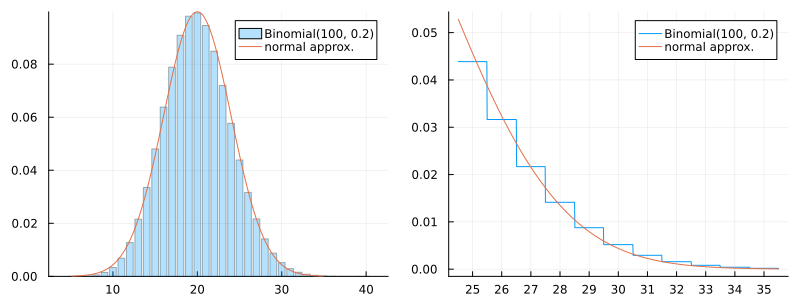

In [7]:
show_all(100, 30, 1/5)

n, p = 100, 1/5
bin = Binomial(n, p)
normal = Normal(mean(bin), std(bin))

P = bar(5:40, bin; alpha=0.3, label="Binomial($n, $p)")
plot!(normal; label="normal approx.")

xs = 24.51:0.01:35.5
Q = plot(xs, x->pdf(bin, round(Int, x)); label="Binomial($n, $p)")
plot!(xs, normal; label="normal approx.")
plot!(xtick=0:n)

plot(P, Q; size=(800, 300))

bin = Binomial(n, p) = Binomial{Float64}(n=100, p=0.4)
normal = Normal(mean(bin), std(bin)) = Normal{Float64}(μ=40.0, σ=4.898979485566356)
beta = Beta(k, (n - k) + 1) = Beta{Float64}(α=50.0, β=51.0)
betaprime = BetaPrime(k, (n - k) + 1) = BetaPrime{Float64}(α=50.0, β=51.0)
fdist = FDist(2k, 2 * ((n - k) + 1)) = FDist{Float64}(ν1=100.0, ν2=102.0)

(beta_inc(k, (n - k) + 1, p))[1] = 0.027099197757009072
(beta_inc_quadgk(k, (n - k) + 1, p))[1] = 0.027099197757008538
ccdf(bin, k - 1) = 0.027099197757009072
ccdf_sum(bin, k - 1) = 0.02709919775700906
cdf(beta, p) = 0.027099197757009072
cdf(betaprime, p / (1 - p)) = 0.027099197757009072
cdf(fdist, ((((n - k) + 1) / k) * p) / (1 - p)) = 0.027099197757009072
ccdf(normal, k) = 0.020613416668581838
ccdf(normal, k - 0.5) = 0.026239749779623296
ccdf(normal, k - 1) = 0.033096289861096716


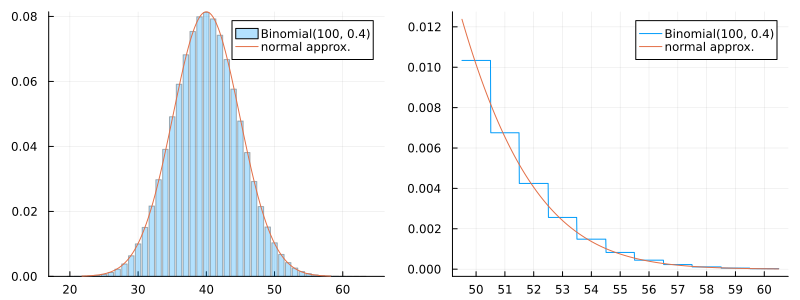

In [8]:
show_all(100, 50, 0.4)

n, p = 100, 0.4
bin = Binomial(n, p)
normal = Normal(mean(bin), std(bin))

P = bar(20:63, bin; alpha=0.3, label="Binomial($n, $p)")
plot!(normal; label="normal approx.")

xs = 49.51:0.01:60.5
Q = plot(xs, x->pdf(bin, round(Int, x)); label="Binomial($n, $p)")
plot!(xs, normal; label="normal approx.")
plot!(xtick=0:n)

plot(P, Q; size=(800, 300))